In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyref.fitting as fit

<Axes: xlabel='dist_from_sub:A', ylabel='alpha:deg'>

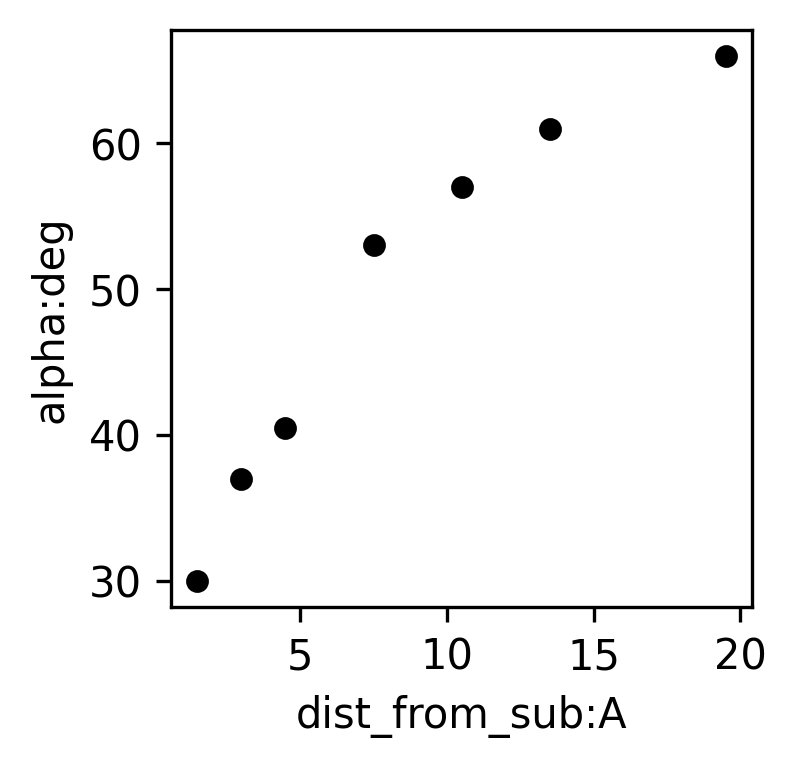

In [9]:
from scipy.optimize import curve_fit
from sigfig import round

mle_to_nm = .3 # nm

data = pd.DataFrame({
    "dist_from_sub:mle" : [.5, 1, 1.5, 2.5, 3.5, 4.5, 6.5],
    "alpha:deg" : [30, 37, 40.5, 53, 57, 61, 66]
})
data["dist_from_sub:nm"] = data["dist_from_sub:mle"] * mle_to_nm
data["dist_from_sub:A"] = data["dist_from_sub:nm"] * 10
fig, ax = plt.subplots(figsize=(2.5, 2.5), dpi=300)
data.plot.scatter(x="dist_from_sub:A", y="alpha:deg", c="k", ax=ax)

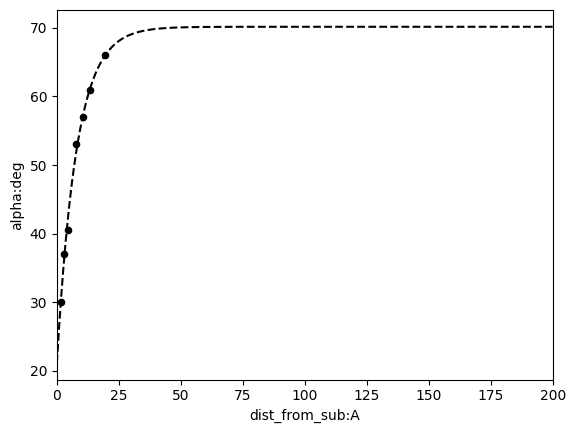

In [10]:
def emperical_exp_value(thickness, characteristic_thickness, max_angle, initial_angle):
    return max_angle *(1-np.exp(-thickness/characteristic_thickness)) + initial_angle

#  Fit to a power law distribution
popt, pcov = curve_fit(emperical_exp_value, data["dist_from_sub:A"], data["alpha:deg"])

err = np.sqrt(np.diag(pcov))
T = round(popt[0], uncertainty=err[0])
rot = round(popt[1], uncertainty=err[1])
rot0 = round(popt[2], uncertainty=err[2])


x = np.linspace(0, 200, 10000)

# Plot
data.plot.scatter(x="dist_from_sub:A", y="alpha:deg", c="k")
plt.plot(x, emperical_exp_value(x, *popt), "k--")
plt.xlim(0, 200)
plt.show()


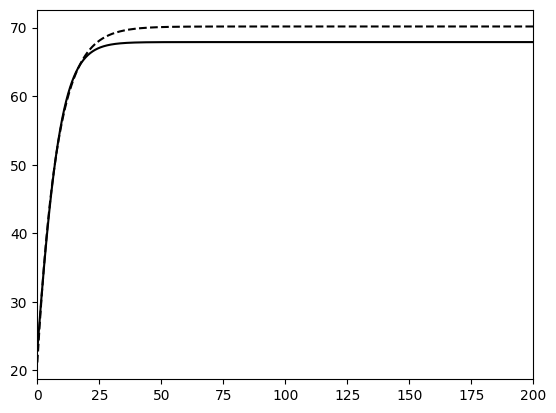

In [11]:
def emperical_tanh_value(thickness, t_0, characteristic_thickness, bulk, substrate):
    return (
        bulk + (substrate - bulk)/2 * (1 - np.tanh((thickness - t_0)/characteristic_thickness))
    )

# Use the correct number of initial guesses: only 4 parameters in the model.
popt_2, pcov_2 = curve_fit(emperical_tanh_value, data["dist_from_sub:A"], data["alpha:deg"], p0=[10, 10, 10, 10])

# Compare the two fits
plt.plot(x, emperical_exp_value(x, *popt), "k--")
plt.plot(x, emperical_tanh_value(x, *popt_2), "k-")
plt.xlim(0, 200)
plt.show()